# Análise de Correlação entre Infraestrutura de Saúde e Saúde Mental

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Carregar datasets
mental_illnesses_df = pd.read_csv('1- mental-illnesses-prevalence.csv')
disease_burden_df = pd.read_csv('2- burden-disease-from-each-mental-illness(1).csv')
depression_prevalence_df = pd.read_csv('3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv')
mental_illness_coverage_df = pd.read_csv('4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv')
anxiety_treatment_gap_df = pd.read_csv('5- anxiety-disorders-treatment-gap.csv')
depressive_symptoms_df = pd.read_csv('6- depressive-symptoms-across-us-population.csv')
primary_data_countries_df = pd.read_csv('7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv')
infrastructure_df = pd.read_csv('WHO_Infrastructure_2010_2014.csv')


Saving 1- mental-illnesses-prevalence.csv to 1- mental-illnesses-prevalence.csv
Saving 2- burden-disease-from-each-mental-illness(1).csv to 2- burden-disease-from-each-mental-illness(1).csv
Saving 3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv to 3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv
Saving 4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv to 4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv
Saving 5- anxiety-disorders-treatment-gap.csv to 5- anxiety-disorders-treatment-gap.csv
Saving 6- depressive-symptoms-across-us-population.csv to 6- depressive-symptoms-across-us-population.csv
Saving 7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv to 7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv
Saving W

## Limpeza e preparação dos dados

In [2]:

# Verificar e tratar valores nulos
infrastructure_df.dropna(inplace=True)

# Normalizar os dados de infraestrutura e prevalência para uma análise consistente
# Filtrar dados para o mesmo conjunto de países e anos
merged_df = pd.merge(mental_illnesses_df, infrastructure_df, left_on=['Entity', 'Year'], right_on=['Country', 'Year'], how='inner')

# Selecionar as colunas relevantes para análise de correlação
analysis_df = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Total density per 100 000 population: Health posts',
                         'Total density per 100 000 population: Health centres',
                         'Total density per 100 000 population: Hospitals']]


## Análise de Correlação

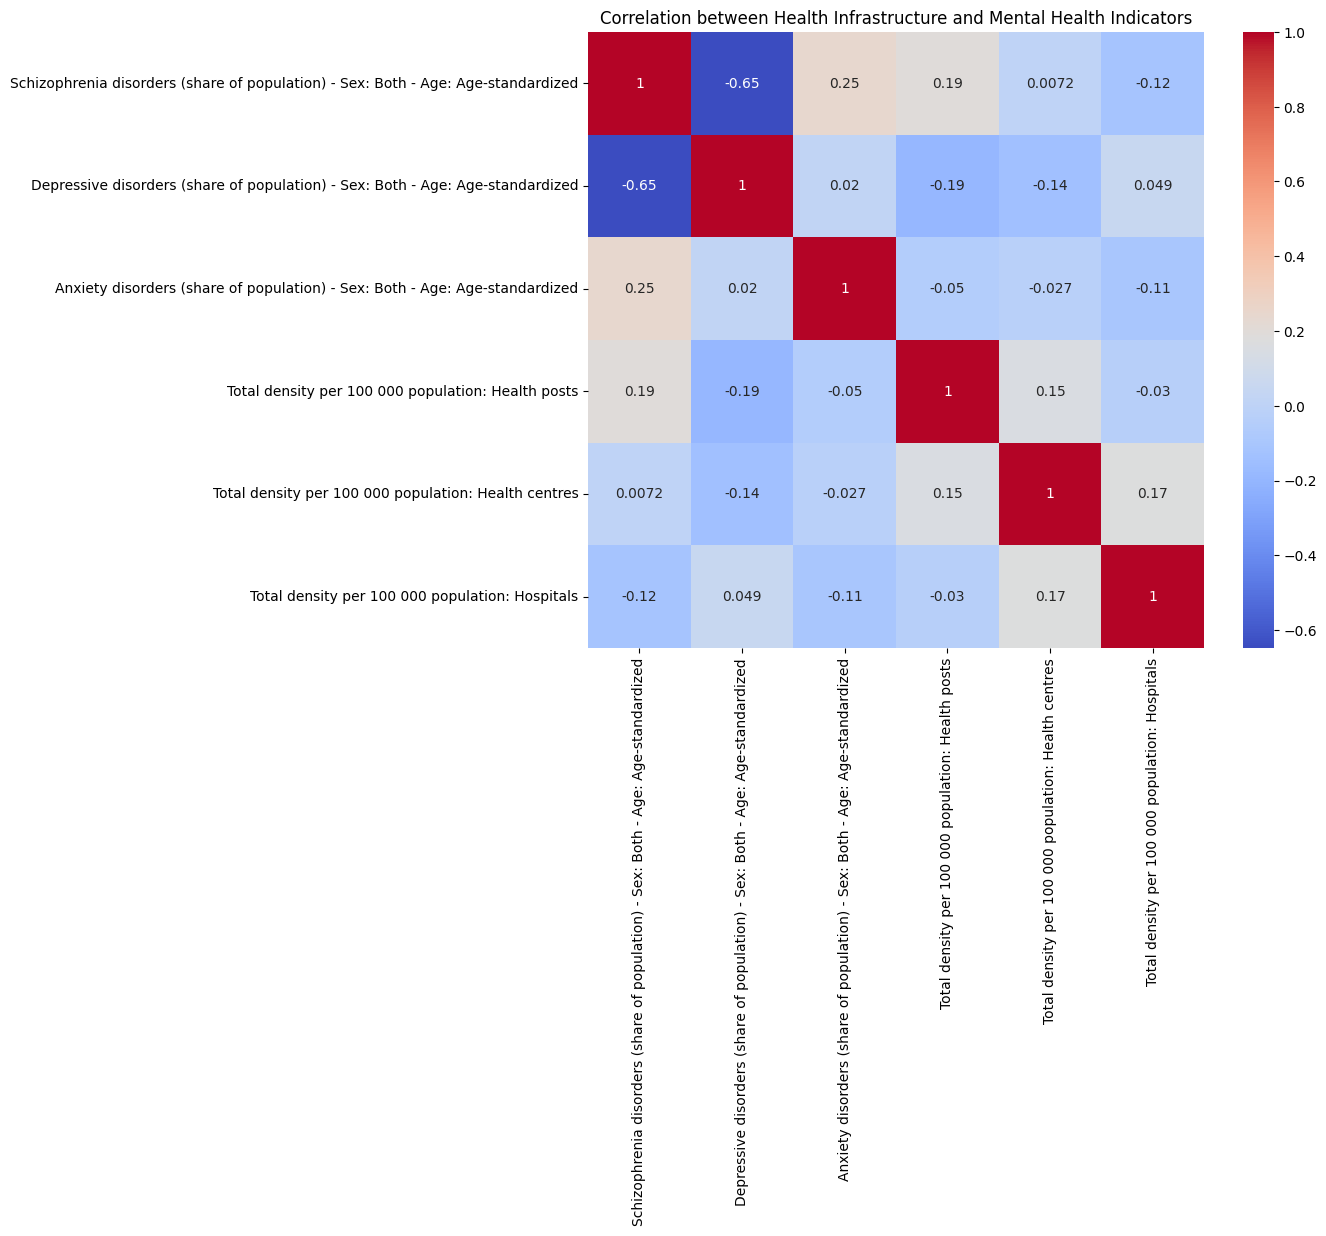

In [3]:

# Calcular a matriz de correlação
corr_matrix = analysis_df.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation between Health Infrastructure and Mental Health Indicators")
plt.show()


### Análise das correlações



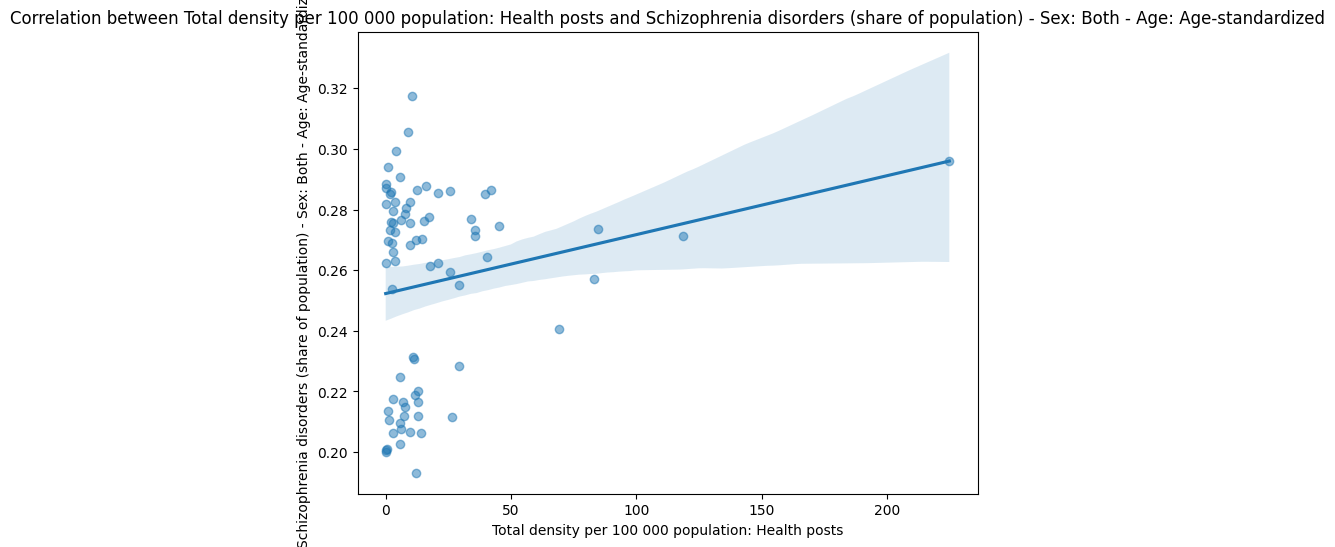

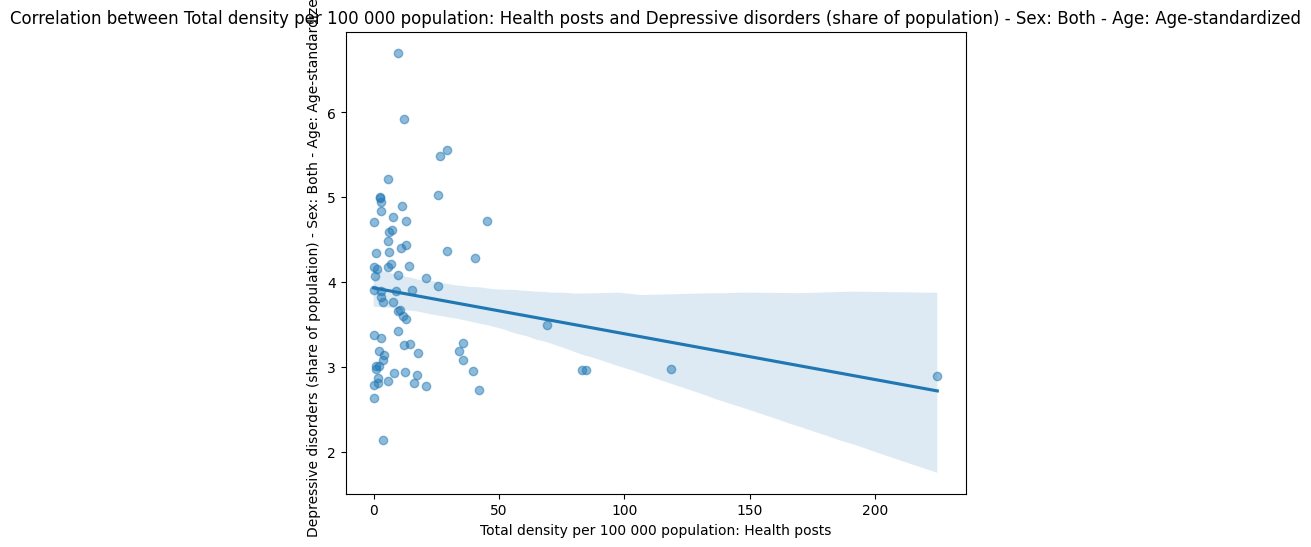

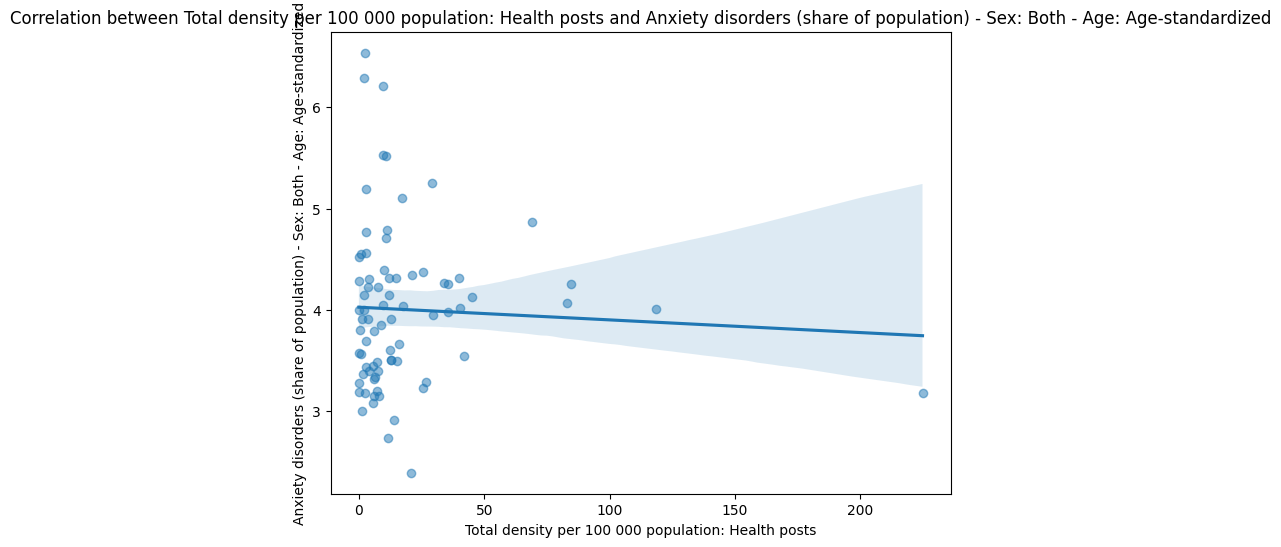

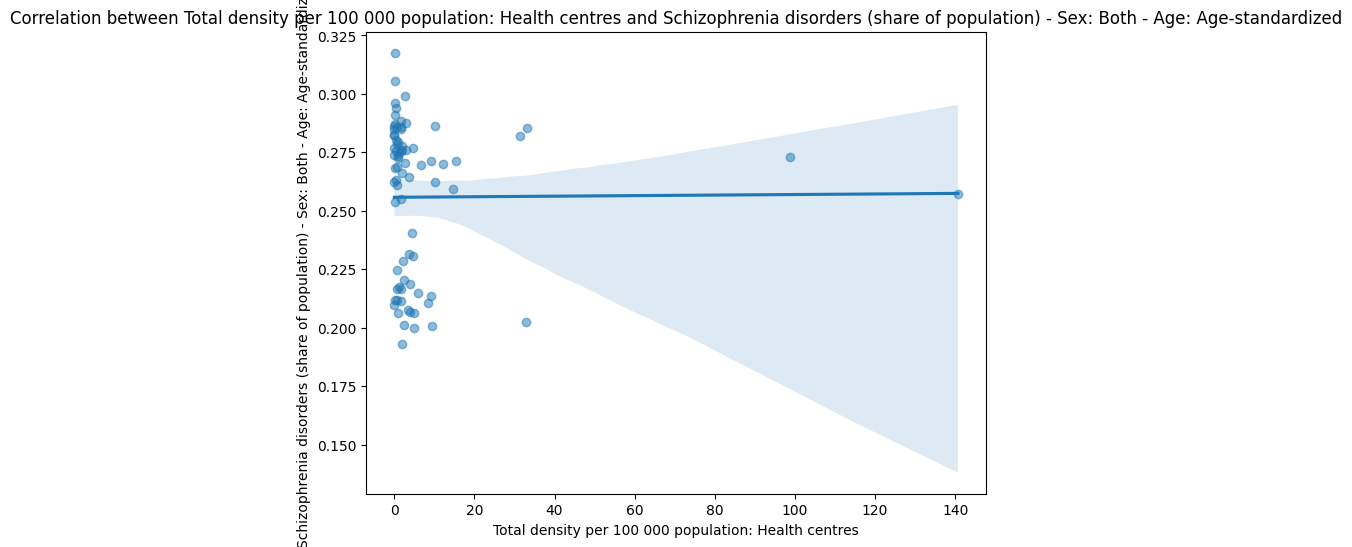

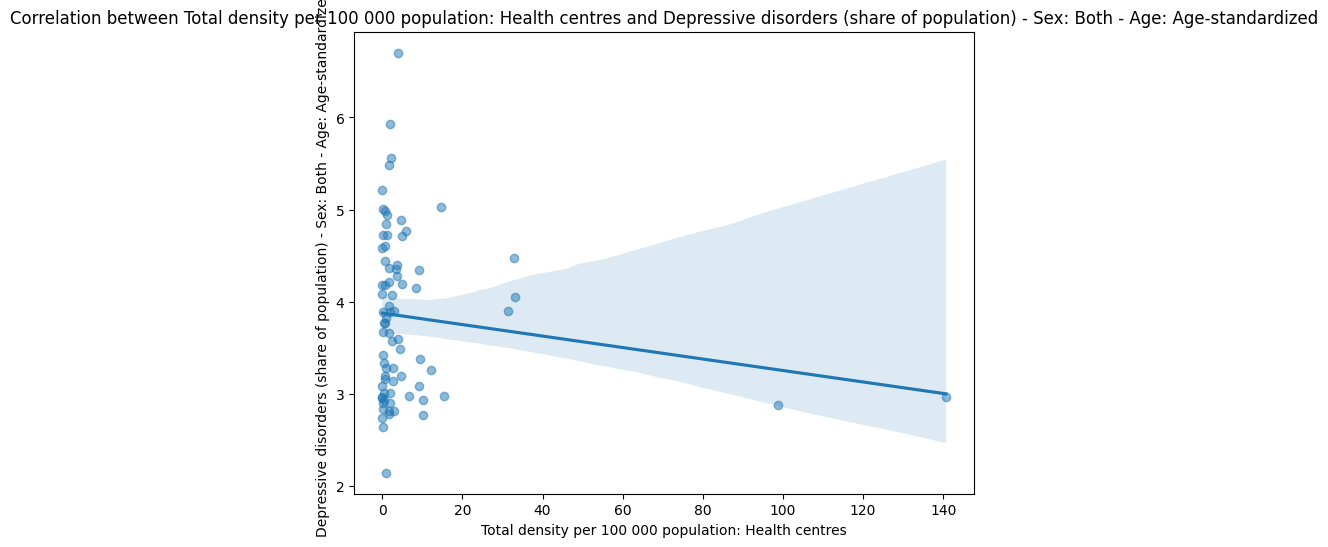

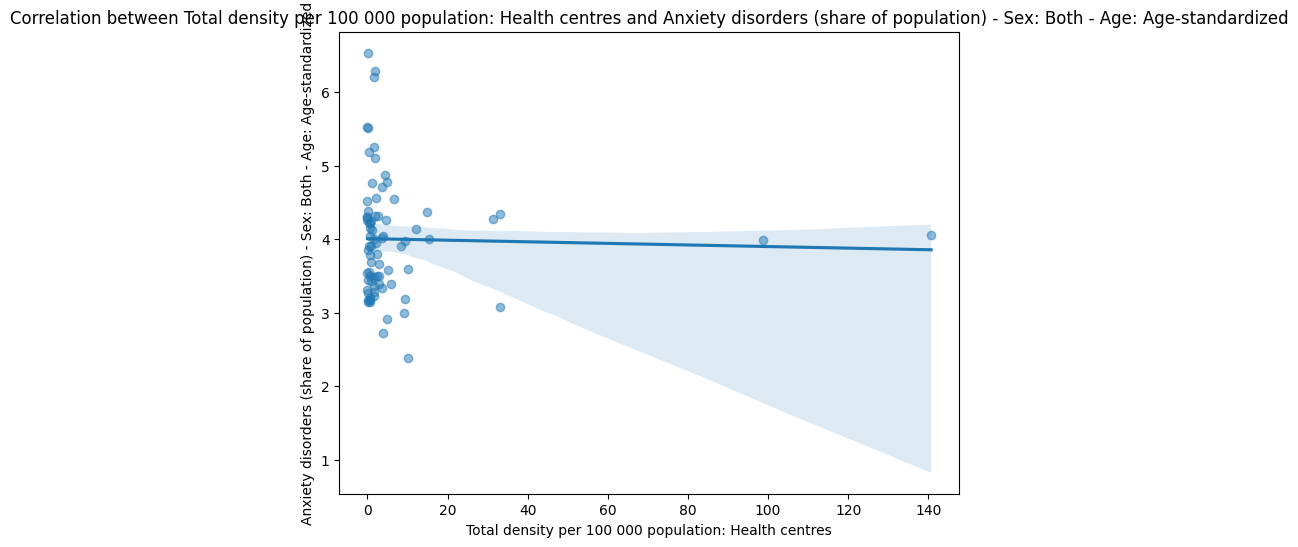

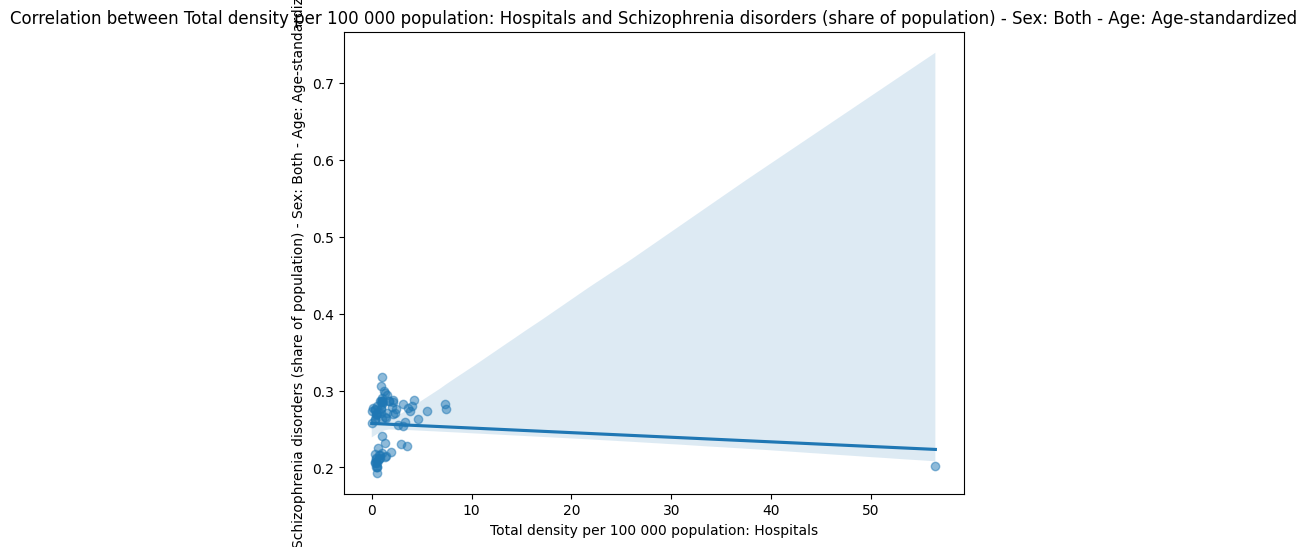

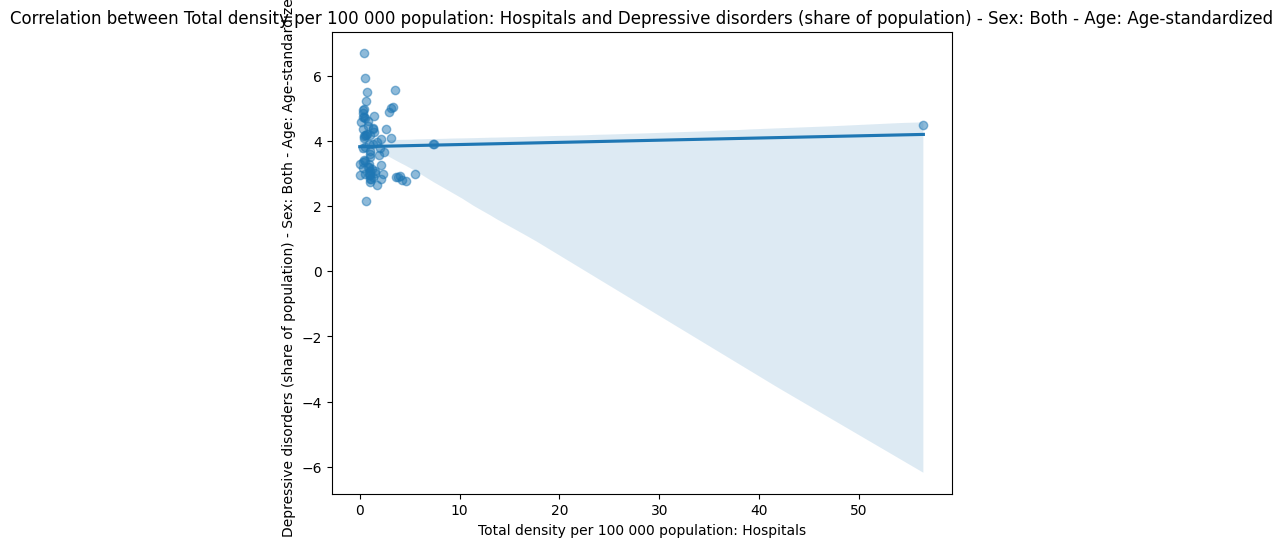

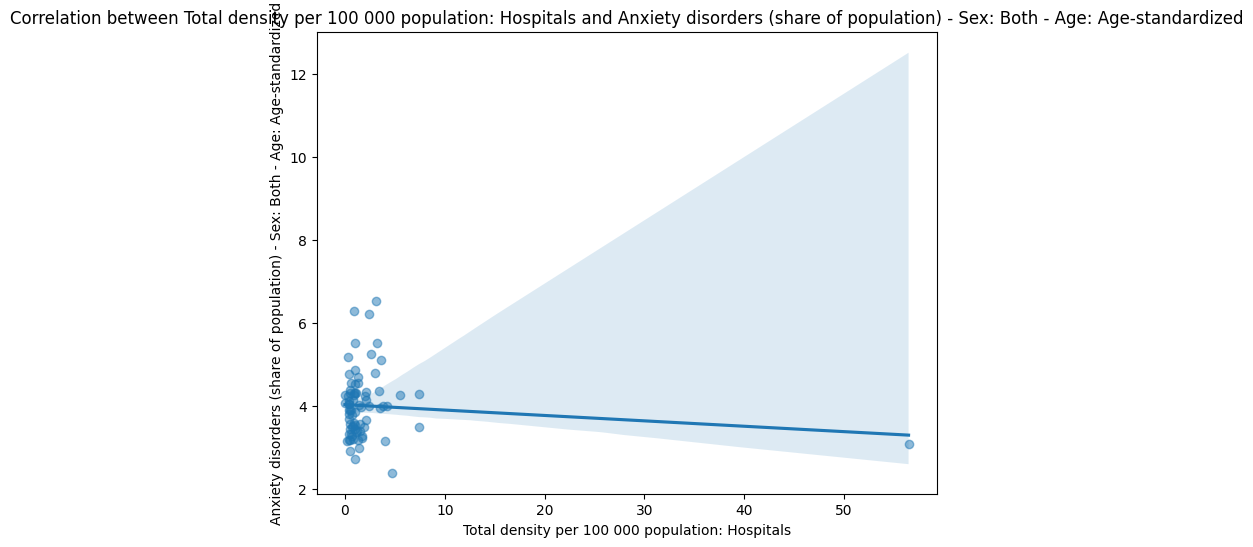

In [4]:
# Variáveis de infraestrutura
infra_columns = [
    'Total density per 100 000 population: Health posts',
    'Total density per 100 000 population: Health centres',
    'Total density per 100 000 population: Hospitals'
]

# Variáveis de saúde mental
mental_health_columns = [
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'
]

# Loop para criar os gráficos de dispersão com linha de tendência
for infra_col in infra_columns:
    for mental_col in mental_health_columns:
        plt.figure(figsize=(8, 6))
        sns.regplot(x=infra_col, y=mental_col, data=analysis_df, scatter_kws={'alpha':0.5})
        plt.title(f'Correlation between {infra_col} and {mental_col}')
        plt.xlabel(infra_col)
        plt.ylabel(mental_col)
        plt.show()


### Análise Temporal - Como a evolução da infraestrutura impactou na população

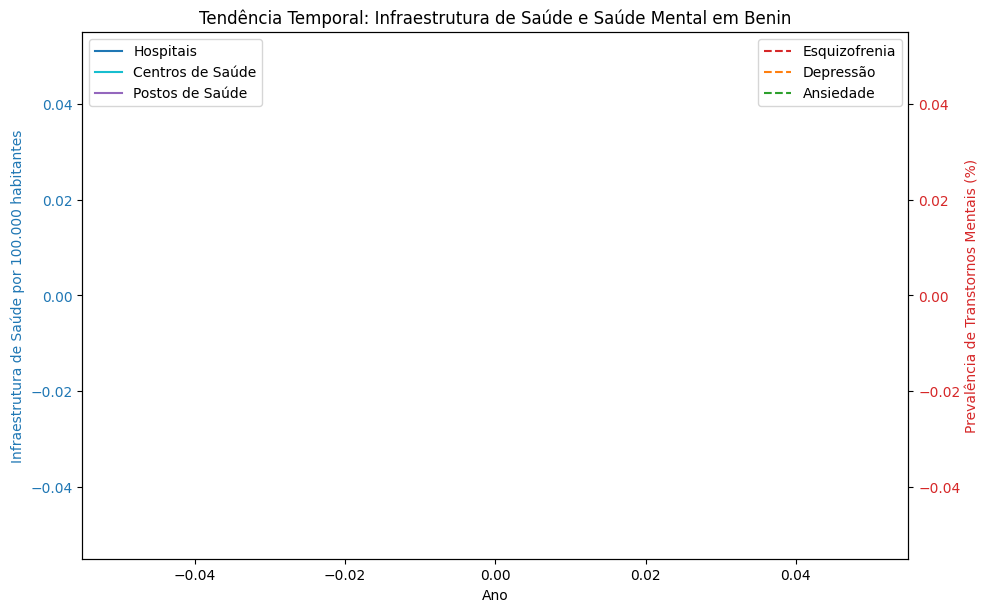

In [9]:
# Seleção de um país para análise temporal (exemplo: "Afghanistan")
country = 'Benin'
temporal_df = merged_df[merged_df['Country'] == country]

# Configuração dos gráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico das taxas de infraestrutura ao longo do tempo
ax1.set_xlabel('Ano')
ax1.set_ylabel('Infraestrutura de Saúde por 100.000 habitantes', color='tab:blue')
ax1.plot(temporal_df['Year'], temporal_df['Total density per 100 000 population: Hospitals'], label='Hospitais', color='tab:blue')
ax1.plot(temporal_df['Year'], temporal_df['Total density per 100 000 population: Health centres'], label='Centros de Saúde', color='tab:cyan')
ax1.plot(temporal_df['Year'], temporal_df['Total density per 100 000 population: Health posts'], label='Postos de Saúde', color='tab:purple')
ax1.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Gráfico da prevalência de transtornos mentais ao longo do tempo
ax2 = ax1.twinx()
ax2.set_ylabel('Prevalência de Transtornos Mentais (%)', color='tab:red')
ax2.plot(temporal_df['Year'], temporal_df['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Esquizofrenia', color='tab:red', linestyle='--')
ax2.plot(temporal_df['Year'], temporal_df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Depressão', color='tab:orange', linestyle='--')
ax2.plot(temporal_df['Year'], temporal_df['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Ansiedade', color='tab:green', linestyle='--')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title(f'Tendência Temporal: Infraestrutura de Saúde e Saúde Mental em {country}')
plt.show()


### Análise de Clusterização - K-Means

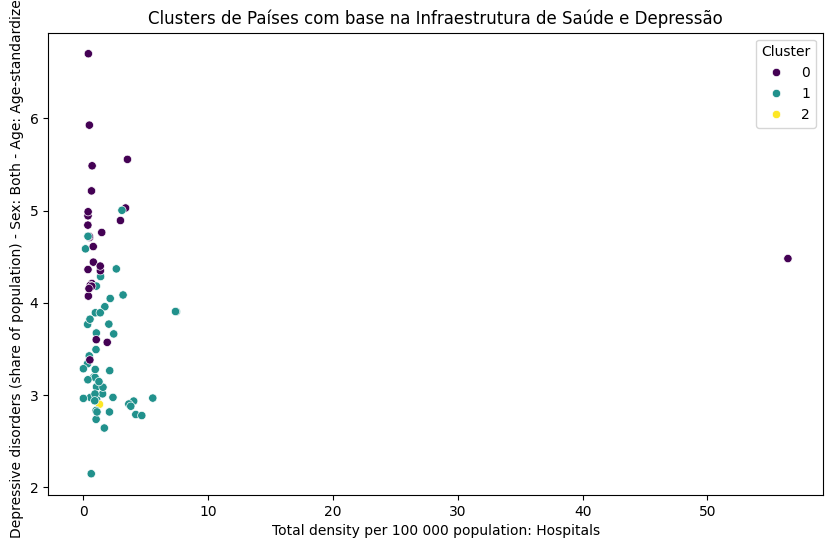

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis para clusterização e remover valores nulos
cluster_data = merged_df[['Total density per 100 000 population: Health posts',
                          'Total density per 100 000 population: Health centres',
                          'Total density per 100 000 population: Hospitals',
                          'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                          'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']].dropna()

# Normalizar os dados
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Aplicar K-Means com 3 clusters (exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualização dos clusters em um par de variáveis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_data, x='Total density per 100 000 population: Hospitals', y='Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', hue='Cluster', palette='viridis')
plt.title('Clusters de Países com base na Infraestrutura de Saúde e Depressão')
plt.show()


### Análise de Cobertura de Tratamento

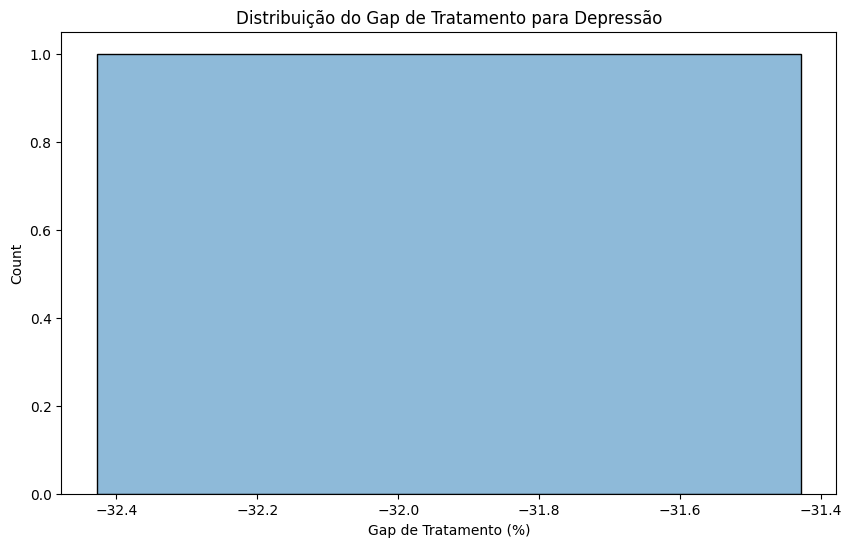

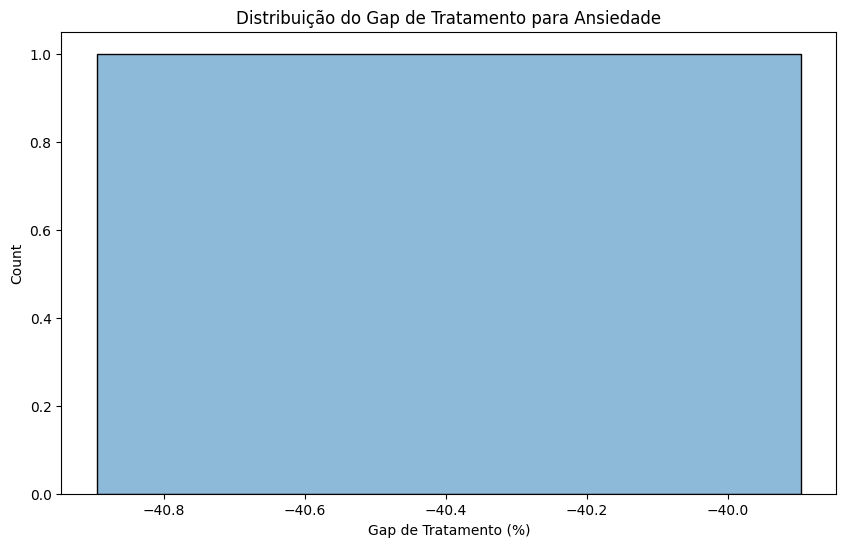

In [10]:
# Supondo que o DataFrame mental_illness_coverage_df contém as taxas de cobertura
coverage_data = mental_illness_coverage_df[['Entity', 'Year', 'Major depression', 'Anxiety disorders']].dropna()
prevalence_data = mental_illnesses_df[['Entity', 'Year', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                                       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Merge dos dados de cobertura e prevalência
treatment_gap_df = pd.merge(prevalence_data, coverage_data, left_on=['Entity', 'Year'], right_on=['Entity', 'Year'], how='inner')

# Calcular o gap de tratamento para depressão e ansiedade
treatment_gap_df['Depression Treatment Gap'] = treatment_gap_df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] - treatment_gap_df['Major depression']
treatment_gap_df['Anxiety Treatment Gap'] = treatment_gap_df['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] - treatment_gap_df['Anxiety disorders']

# Visualizar o gap de tratamento para depressão
plt.figure(figsize=(10, 6))
sns.histplot(treatment_gap_df['Depression Treatment Gap'], kde=True)
plt.title('Distribuição do Gap de Tratamento para Depressão')
plt.xlabel('Gap de Tratamento (%)')
plt.show()

# Visualizar o gap de tratamento para ansiedade
plt.figure(figsize=(10, 6))
sns.histplot(treatment_gap_df['Anxiety Treatment Gap'], kde=True)
plt.title('Distribuição do Gap de Tratamento para Ansiedade')
plt.xlabel('Gap de Tratamento (%)')
plt.show()


### Modelagem Preditiva - Previsão de Prevalência Futura

Mean Squared Error (MSE) para a previsão de prevalência de depressão: 2.9232589128564612


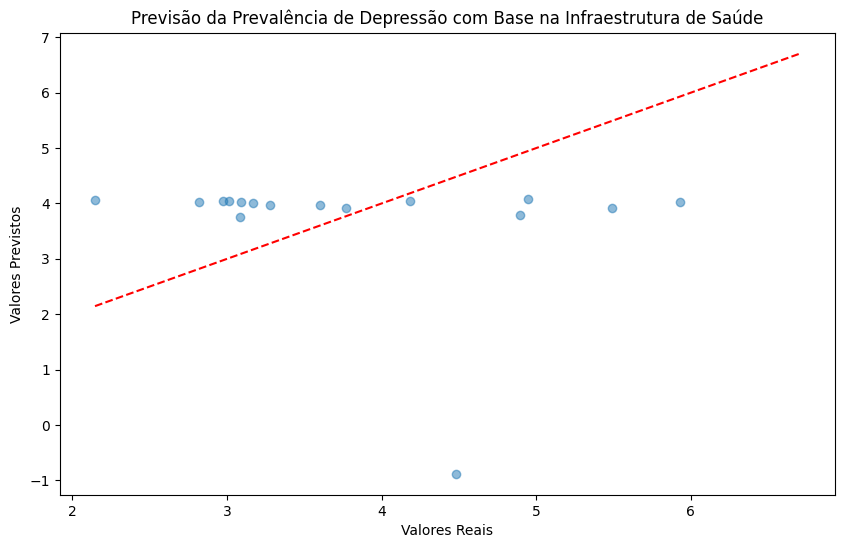

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparação dos dados para a previsão
X = merged_df[['Total density per 100 000 population: Health posts',
               'Total density per 100 000 population: Health centres',
               'Total density per 100 000 population: Hospitals']].fillna(0)
y = merged_df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE) para a previsão de prevalência de depressão: {mse}')

# Visualizar as previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsão da Prevalência de Depressão com Base na Infraestrutura de Saúde')
plt.show()


### Análise de Desigualdade e Socioeconômica

In [13]:
# Supondo que há uma coluna 'GDP per capita' em 'infrastructure_df' com dados socioeconômicos
# Realizar correlação entre PIB per capita e prevalência de transtornos mentais

# Merge dos dados
socioeconomic_df = pd.merge(merged_df, infrastructure_df[['Country', 'Year', 'GDP per capita']], on=['Country', 'Year'], how='inner')

# Calcular a correlação
socio_corr = socioeconomic_df[['GDP per capita',
                               'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(socio_corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlação entre PIB per Capita e Transtornos Mentais")
plt.show()


KeyError: "['GDP per capita'] not in index"

### Análise de Séries Temporais para Mudanças Rápidas

<ipython-input-14-00d7ec7a9695>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=significant_changes, x='Hospitals YoY Change', y='Depression YoY Change', hue='Country', palette='tab20')


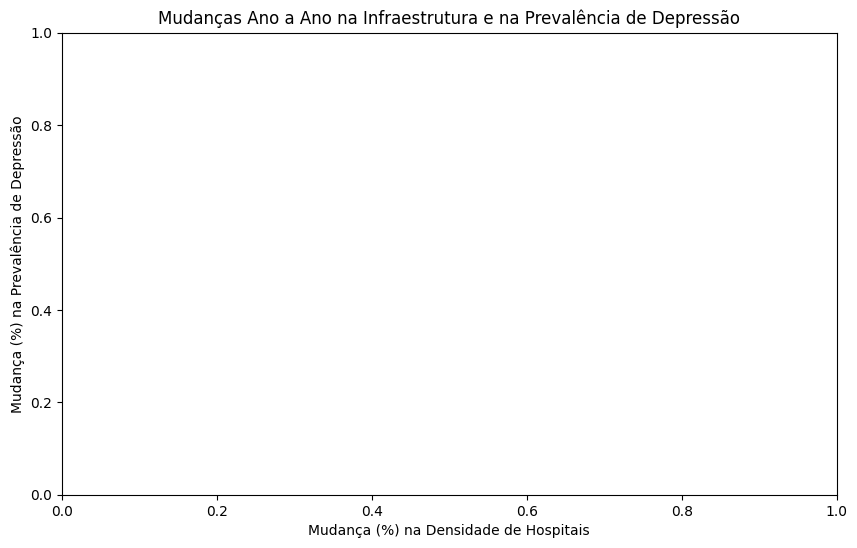

In [14]:
# Calcular a variação percentual ano a ano para infraestrutura e prevalência de transtornos mentais
merged_df['Hospitals YoY Change'] = merged_df.groupby('Country')['Total density per 100 000 population: Hospitals'].pct_change() * 100
merged_df['Depression YoY Change'] = merged_df.groupby('Country')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].pct_change() * 100

# Filtrar países com mudanças significativas
significant_changes = merged_df[(merged_df['Hospitals YoY Change'].abs() > 20) | (merged_df['Depression YoY Change'].abs() > 10)]

# Visualizar as mudanças ano a ano
plt.figure(figsize=(10, 6))
sns.scatterplot(data=significant_changes, x='Hospitals YoY Change', y='Depression YoY Change', hue='Country', palette='tab20')
plt.title('Mudanças Ano a Ano na Infraestrutura e na Prevalência de Depressão')
plt.xlabel('Mudança (%) na Densidade de Hospitais')
plt.ylabel('Mudança (%) na Prevalência de Depressão')
plt.show()


### Análise de Subgrupos Específicos - Transtornos e Faixas Etárias

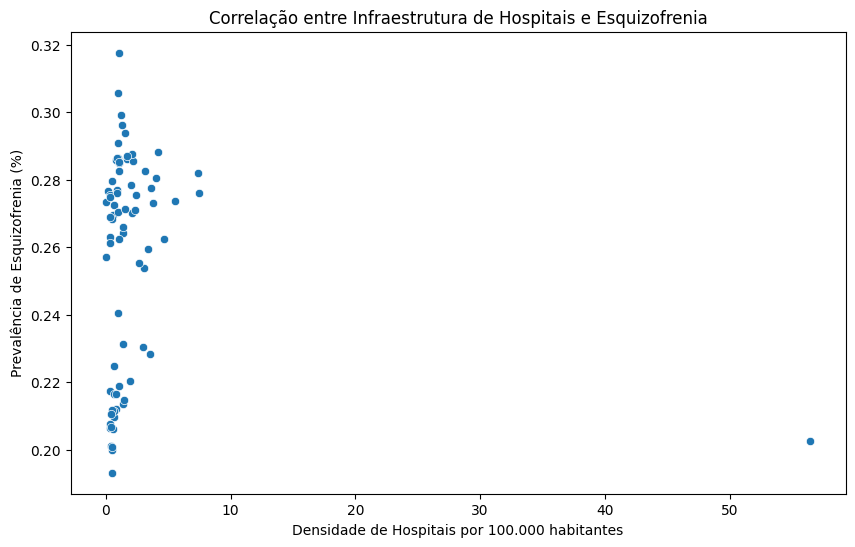

In [15]:
# Filtrar dados para um transtorno específico (ex.: esquizofrenia)
schizophrenia_df = merged_df[['Country', 'Year', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                              'Total density per 100 000 population: Hospitals']]

# Plot para visualizar a relação entre infraestrutura e prevalência de esquizofrenia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=schizophrenia_df, x='Total density per 100 000 population: Hospitals',
                y='Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized')
plt.title('Correlação entre Infraestrutura de Hospitais e Esquizofrenia')
plt.xlabel('Densidade de Hospitais por 100.000 habitantes')
plt.ylabel('Prevalência de Esquizofrenia (%)')
plt.show()
